<div style="text-align:center; margin-top:40px;">
  <span style="
    color:#568203;
    font-family:Georgia, serif;
    font-size:42px;
    font-weight:bold;
    text-shadow: 1px 1px 3px #aaa;
    letter-spacing: 2px;
    animation: glow 1.5s ease-in-out infinite alternate;">
    TELECOM CUSTOMER CHURN PREDICTION 📈
  </span>
</div>

<style>
@keyframes glow {
  from {
    text-shadow: 1px 1px 3px #aaa, 0 0 10px #00a86b, 0 0 20px #00a86b;
  }
  to {
    text-shadow: 1px 1px 3px #aaa, 0 0 20px #00cc99, 0 0 30px #00cc99;
  }
}
</style>


<center><span style="font-family:Palatino; font-size:22px;"><i> Churn prediction aims to identify customers likely to <span style="color:#DC143C;">discontinue</span> a service or product before they actually do so.</i></span> </center>

![Chrun_Image](assets/chrun1.png)

# Content

1. [Introduction](#Introduction)
    * [What is Customer Churn?](#Introduction)
    * [What is Churn Prediction?](#Introduction)
    * [Why is Chrun Prediction Important](#Introduction)
    * [How is Chrun Predict](#Introduction)
    * [Example](#Introduction)
    * [Business Objectives](#Introduction)
2. [Import Libraries](#Import-Libraries)
3. [Load Dataset](#Load-Dataset)
4. [Undertanding The Data](#Undertanding-The-Data)
    * [Observations](#Undertanding-The-Data)
5. [Data Visualization](#Data-Visualization)
6. [Data Preprocessing](#Data-Preprocessing)
   * [Data Cleaning](#61)
   * [Data Transformation](#62)
   * [Data Scaling](#63)
   * [Data Integration](#64)
   * [Data Reduction](#65)
7. [Split Data](#Split-Data)
    * [Balance Dataset](#81)
    * [Split Dataset](#82)
8. [Machine Learning Model Evaluations and Predictions](#Machine-Learning-Model)
    * [Logistic Regression](#10)
    * [KNN](#10)
    * [Naive Bayes](#10)
    * [Decision Tree](#10)
    * [Stacking](#10)
    * [Random Forest](#10)
    * [Gradient Boosting](#10)
    * [XGBoost](#10)
    * [Neural Network](#10)
    * [Model Selection](#10)
9. [Improve the Model](#Improve-the-Model)
    * [Model Evaluation](#11)
10. [Save Model](#Save-Model)
11. [References](#References)



# Introduction

## What is Customer Chrun 
Churn prediction is the process of identifying which customers are likely to cancel their subscriptions or stop using a service. It's a crucial practice for businesses because acquiring new customers is often more expensive than retaining existing ones. By predicting which customers are at risk of churning, businesses can proactively implement strategies to re-engage them and prevent them from leaving. 

## What is Churn Prediction?
- **Identifying At-Risk Customers:**
Churn prediction models analyze various data points about customers to determine the likelihood of them leaving a business. 
- **Early Warning System:**
It acts as an early warning system, alerting businesses to potential customer loss before it happens. 
- **Data-Driven Approach:**
It relies on analyzing customer behavior, transaction history, engagement data, and other relevant information to identify patterns associated with churn. 
- **Preventative Measure:**
By identifying at-risk customers, businesses can implement targeted interventions like personalized offers, improved customer support, or tailored communication to prevent them from churning. 

## Why is Churn Prediction Important?
- **Cost Savings:**
Acquiring new customers is generally more expensive than retaining existing ones. 
- **Revenue Retention:**
Preventing churn helps businesses maintain their revenue stream and avoid losses. 
- **Improved Customer Lifetime Value (CLTV):**
By retaining customers longer, businesses can increase the overall value they derive from each customer. 
- **Competitive Advantage:**
Businesses that are proactive in churn prediction and prevention gain a competitive edge by keeping their customer base stable and loyal. 

## How is Churn Predicted?
- **Data Collection:**
Collecting relevant data about customer behavior, such as purchase history, website activity, support interactions, and demographics. 
- **Model Selection:**
Choosing appropriate machine learning models like logistic regression, decision trees, or ensemble methods to analyze the data and predict churn. 
- **Model Training and Evaluation:**
Training the chosen model on historical data and evaluating its performance to ensure accuracy. 
- **Prediction and Action:**
Using the trained model to predict which customers are likely to churn and implementing targeted retention strategies. 

## Examples of Churn Prediction in Different Industries:
- **Subscription Services:**
Identifying customers who haven't logged in for a while or have reduced their usage of the service. 
- **E-commerce:**
Detecting customers who haven't made a purchase in a certain period or have abandoned their shopping carts. 
- **Telecommunications:**
Analyzing usage patterns, billing issues, or customer service interactions to predict churn. 

## 🎯 Business Objective
- **Retain customers:** It's often more cost-effective to keep existing customers than to acquire new ones.
- **Identify at-risk customers early:** So businesses can intervene with discounts, promotions, or personalized communication.
- **Increase revenue and loyalty:** By targeting retention efforts more precisely.
- What's the % of Churn Customers and customers that keep in with the active services?
- Is there any patterns in Churn Customers based on the gender?
- Is there any patterns/preference in Churn Customers based on the type of service provided?
- What's the most profitable service types?
- Which features and services are most profitable?
- Many more questions that will arise during the analysis

# Import-Libraries

In [1]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1]:
# Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Imbalace Dataset
from imblearn.over_sampling import SMOTE

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Metrices
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Import Pickle and OS
import pickle
import os

# Load-Dataset

In [3]:
try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print('Data Successfully Read')
except FileNotFoundError:
    print("Error: data not found.")
    exit() 

Data Successfully Read


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Undertanding-The-Data

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
obj_col = df.select_dtypes(include=['object']).columns.tolist()
num_col = df.select_dtypes(include=['int64']).columns.tolist()
float_col = df.select_dtypes(include=['float64']).columns.tolist()

print(f'Object Column: {obj_col}')
print(f'Numaric Column: {num_col}')
print(f'Float Column: {float_col}')

Object Column: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Numaric Column: ['SeniorCitizen', 'tenure']
Float Column: ['MonthlyCharges']


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df.sample(5).T

,3205,3162,6492,6754,2037
customerID,3810-DVDQQ,6429-SHBCB,9548-LERKT,2775-SEFEE,8309-IEYJD
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,1
Partner,Yes,No,Yes,No,No
Dependents,Yes,No,No,Yes,No
tenure,72,19,24,0,1
PhoneService,Yes,Yes,Yes,Yes,Yes
MultipleLines,Yes,Yes,No,Yes,No
InternetService,Fiber optic,DSL,No,DSL,Fiber optic
OnlineSecurity,Yes,No,No internet service,Yes,No


In [13]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [14]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [15]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

## Obsservation

**The data set includes information about:**
- **Customers who left within the last month** – the column is called Churn
- **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- **Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- **Demographic info about customers** – gender, age range, and if they have partners and dependents

| Column             | Type      | Description                                                    |
| ------------------ | --------- | -------------------------------------------------------------- |
| `customerID`       | object    | Unique customer identifier (can be dropped for ML)             |
| `gender`           | object    | Male/Female                                                    |
| `SeniorCitizen`    | int64     | 1 if senior, 0 otherwise                                       |
| `Partner`          | object    | Yes/No – has a partner                                         |
| `Dependents`       | object    | Yes/No – has dependents                                        |
| `tenure`           | int64     | Number of months the customer has stayed                       |
| `PhoneService`     | object    | Yes/No                                                         |
| `MultipleLines`    | object    | No, Yes, or No phone service                                   |
| `InternetService`  | object    | DSL, Fiber optic, or No                                        |
| `OnlineSecurity`   | object    | Yes/No/No internet service                                     |
| `OnlineBackup`     | object    | Same as above                                                  |
| `DeviceProtection` | object    | Same as above                                                  |
| `TechSupport`      | object    | Same as above                                                  |
| `StreamingTV`      | object    | Same as above                                                  |
| `StreamingMovies`  | object    | Same as above                                                  |
| `Contract`         | object    | Month-to-month, One year, Two year                             |
| `PaperlessBilling` | object    | Yes/No                                                         |
| `PaymentMethod`    | object    | 4 methods (e.g., Electronic check, Mailed check)               |
| `MonthlyCharges`   | float64   | The amount charged to the customer monthly                     |
| `TotalCharges`     | object ⛔️ | Needs conversion to numeric (contains invalid/missing entries) |
| `Churn`            | object ✅  | **Target** variable: Yes = churned, No = stayed                |


**Drop Columns**
1. `customerID`

**Usefull Columns**
**Numarical Features**
1. `tenure`
2. `MonthlyCharges`
3. `TotalCharges`

**Categorical Features**
- **Binary**
    1. `gender`
    2. `SeniorCitizen`
    3. `Partner`
    4. `Dependents`
    5. `PhoneService`
    6. `MultipleLines`
    7. `OnlineSecurity`
    8. `OnlineBackup`
    9. `DeviceProtection`
    10. `TechSupport`
    11. `StreamingTV`
    12. `StreamingMovies`
    13. `PaperlessBilling`
  
- **Nominal**
    1. `InternetService`
    2. `PaymentMethod`
- **Ordinal**
    1. `Contract`



**Alphanumaric Features**
1. No Alphanumaric Features

**Missing Values**
1. No Missing Values
 
**Output Column**
1. `Churn`

# Data-Visualization

## `gender`

gender
Female    939
Male      930
Name: count, dtype: int64


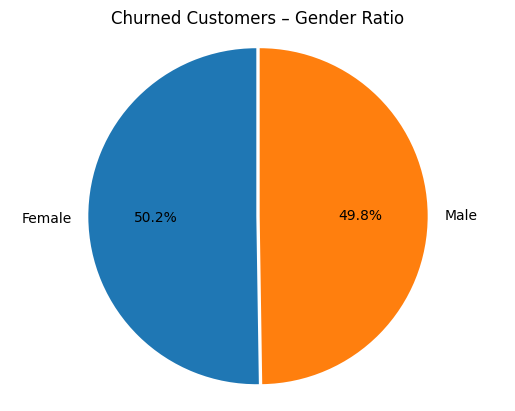

In [16]:
# Gender Counts
gender_counts = df[df['Churn'] == 'Yes']['gender'].value_counts()
print(gender_counts)
explode = (0, 0.02)

# Create pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Churned Customers – Gender Ratio')
plt.axis('equal')  # Ensures pie is a circle
plt.show()


- **50.2%** - Female Switch to another Company
- **49.8%** - Male Switch to another Company

## `SeniorCitizen`

SeniorCitizen
0    1393
1     476
Name: Churn, dtype: int64


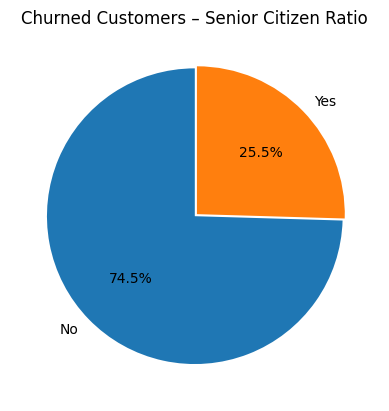

In [17]:
SeniorCitizen_counts = df["Churn"][df["Churn"]=="Yes"].groupby(by=df['SeniorCitizen']).count()
# df[df['Churn']=='Yes']['SeniorCitizen'].value_counts()

print(SeniorCitizen_counts)
explode = (0, 0.02)

plt.pie(SeniorCitizen_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Churned Customers – Senior Citizen Ratio')
plt.show()

- **25.5%** of senior citizens switched to another company
- **74.5%** of senior citizens stayed with this company

## `tenure`

**🔍 What’s Happening**\
You’re using:
```python
include_lowest=False
```
Which means:
- **Left edges are open**, and **right edges are closed**: the bin (60, 72] includes values **greater than 60 and up to 72**
- So `72` ends up in `'5th_Year'` (the bin ending at 72), not `'6th_Year'`

---

**✅ How to Fix It**\
To make sure `72` gets assigned to `'6th_Year'`, you need to **shift the bin boundaries slightly**, so `72` falls into the last bin:

**✔ Option 1: Use `right=False`**\
This flips the rule—**left edges are closed**, and **right edges are open**:

```python
df['tenure_group'] = pd.cut(
    x=df['tenure'],
    bins=[0, 12, 24, 36, 48, 60, 72, np.inf],
    labels=['<1yr', '1st_Year', '2nd_Year', '3rd_Year', '4th_Year', '5th_Year', '6th_Year'],
    right=False
)
```

**🧠 Bonus: See Bin Logic in Action**\
Here's what the bin rules look like when `right=False`:

| Interval         | Label       |
|------------------|-------------|
| [0, 12)          | `<1yr`      |
| [12, 24)         | `1st_Year`  |
| …                | …           |
| [72, inf)        | `6th_Year`  |

In [18]:
bins = [0, 12, 24, 36, 48, 60, 72, np.inf]  # 7 edges → 6 bins
labels = ['<1yr', '1st_Year', '2nd_Year', '3rd_Year', '4th_Year', '5th_Year', '6th_Year']

df['tenure_group'] = pd.cut(
    x=df['tenure'],
    bins=[0, 12, 24, 36, 48, 60, 72, np.inf],
    labels=['<1yr', '1st_Year', '2nd_Year', '3rd_Year', '4th_Year', '5th_Year', '6th_Year'],
    right=False
)

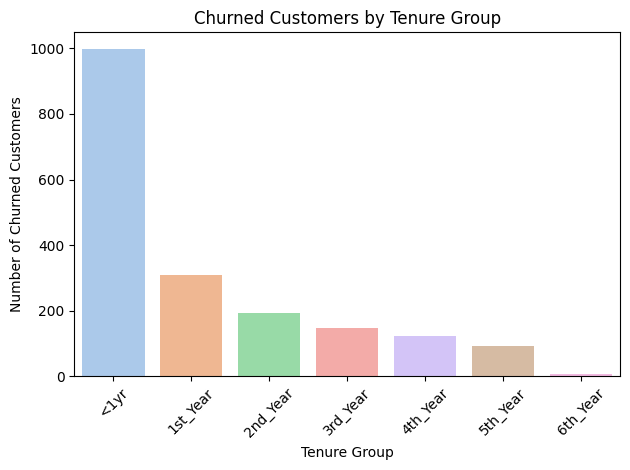

In [19]:
tenure_group_counts = df['Churn'][df['Churn']=='Yes'].groupby(by=df['tenure_group']).count()
#tenure_group_counts = df[df['Churn'] == 'Yes']['tenure_group'].value_counts().sort_index()

# Plot bar chart
sns.barplot(
    x=tenure_group_counts.index,
    y=tenure_group_counts.values,
    palette='pastel'
)

plt.title("Churned Customers by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Number of Churned Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


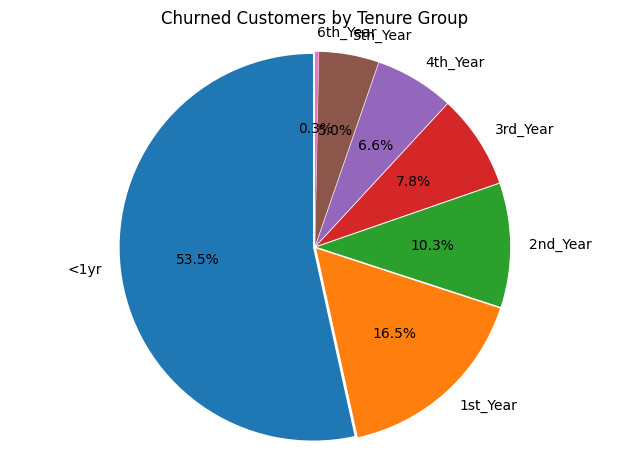

In [20]:
# Count churned customers per tenure group
tenure_group_counts = df[df['Churn'] == 'Yes']['tenure_group'].value_counts().sort_index()

# Pie chart visualization
explode = [0.01] * len(tenure_group_counts) 
plt.pie(
    tenure_group_counts,
    labels=tenure_group_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode
)
plt.title('Churned Customers by Tenure Group')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [21]:
tenure_group_counts

tenure_group
<1yr        999
1st_Year    309
2nd_Year    193
3rd_Year    146
4th_Year    123
5th_Year     93
6th_Year      6
Name: count, dtype: int64

- **53.5%** of customers with less than 1 year of tenure switched to another company
- **16.5%** of customers in their 1st year switched to another company
- **10.3%** of customers in their 2nd year switched to another company
- **7.8%** of customers in their 3rd year switched to another company

## Services

In [22]:
service_list = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

service_yes = []
service_no = []
service_no_phone = []

for service in service_list:
    # Count values for churned customers
    churned_counts = df[df['Churn'] == 'Yes'][service].value_counts()
    
    # Append counts with safe fallback
    service_yes.append(churned_counts.get('Yes', 0))
    service_no.append(churned_counts.get('No', 0))
    
    # Combine 'No phone service' and 'No internet service'
    no_service_count = churned_counts.get('No phone service', 0) + churned_counts.get('No internet service', 0)
    service_no_phone.append(no_service_count)

summary_df = pd.DataFrame({
    'Service': service_list,
    'Yes': service_yes,
    'No': service_no,
    'No Phone/Internet Service': service_no_phone
})

summary_df

,Service,Yes,No,No Phone/Internet Service
0,PhoneService,1699,170,0
1,MultipleLines,850,849,170
2,OnlineSecurity,295,1461,113
3,OnlineBackup,523,1233,113
4,DeviceProtection,545,1211,113
5,TechSupport,310,1446,113
6,StreamingTV,814,942,113
7,StreamingMovies,818,938,113


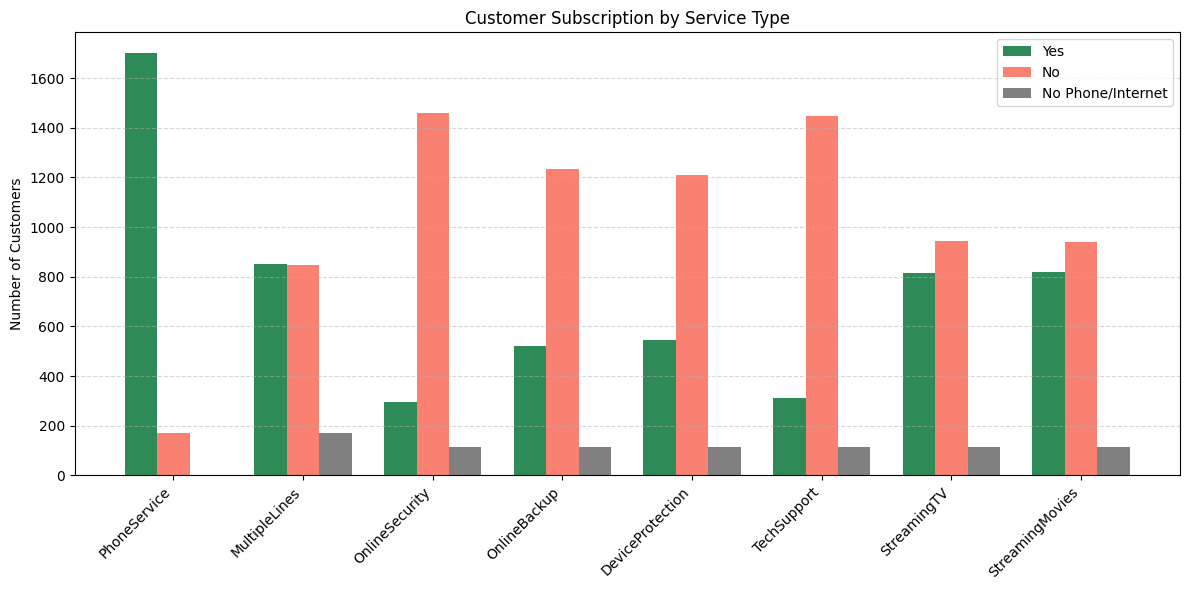

In [23]:
# Bar width and x locations
bar_width = 0.25
x = range(len(summary_df))

# Create the grouped bar plot
plt.figure(figsize=(12, 6))

plt.bar([i - bar_width for i in x], summary_df['Yes'], width=bar_width, label='Yes', color='seagreen')
plt.bar(x, summary_df['No'], width=bar_width, label='No', color='salmon')
plt.bar([i + bar_width for i in x], summary_df['No Phone/Internet Service'], width=bar_width, label='No Phone/Internet', color='gray')

# Add labels and formatting
plt.xticks(ticks=x, labels=summary_df['Service'], rotation=45, ha='right')
plt.ylabel('Number of Customers')
plt.title('Customer Subscription by Service Type')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()

📊 **Summary of Service Subscription Trends**

1. **PhoneService**:

   * Vast majority of customers have phone service (`Yes` = 1699).
   * Very few opted out (`No` = 170).
   * No customers without phone service entirely (`No Phone/Internet` = 0).

2. **MultipleLines**:

   * Fairly balanced split between `Yes` (850) and `No` (849).
   * 170 customers don't have phone service.

3. **Internet-Dependent Services** (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`):

   * All show a **consistent segment of 113 customers** with no internet access.
   * Majority of customers **do not subscribe** to these add-on services.

     * Example: `OnlineSecurity` → 1461 say No, only 295 say Yes.
   * `TechSupport` and `OnlineSecurity` have the **lowest "Yes" counts**, indicating these features are the least adopted.

4. **Streaming Services** (`StreamingTV` & `StreamingMovies`):

   * Adoption is relatively higher (`Yes` ≈ 800+) compared to other internet add-ons.
   * Still, nearly as many customers choose not to use them.

---

🧠 **Insights for Business Decisions**

* There is an opportunity to **upsell** underutilized services like `OnlineSecurity`, `TechSupport`, and `OnlineBackup`.
* The popularity of **PhoneService** and **Streaming services** suggests these are essential or highly valued.
* A significant portion (113–170) of customers **lack internet or phone service**, which could be a unique segment (e.g., minimal usage or prepaid plans).

## `Contract`

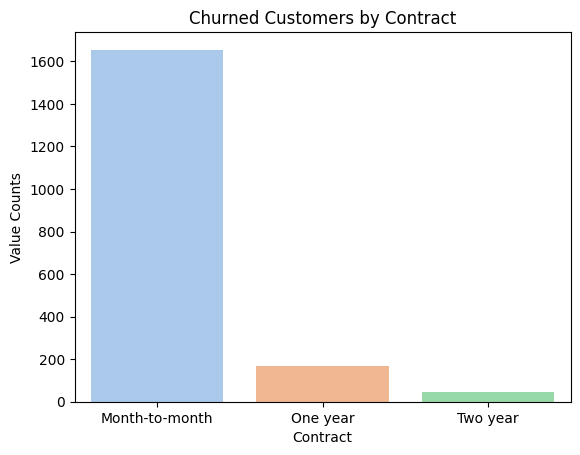

Contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64


In [24]:
contract_counts = df[df['Churn']=='Yes']['Contract'].value_counts()
sns.barplot(
    x = contract_counts.index,
    y = contract_counts.values,
    palette='pastel'
)

plt.xlabel('Contract')
plt.ylabel('Value Counts')
plt.title('Churned Customers by Contract')
plt.show()
print(contract_counts)

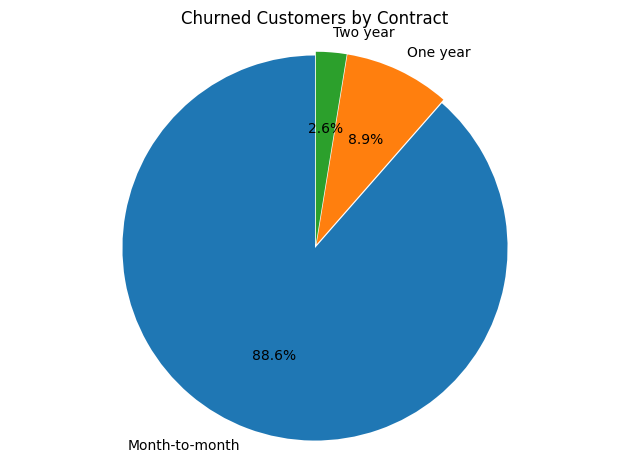

In [25]:
# Pie chart visualization
explode = [0.01] * len(contract_counts) 
plt.pie(
    contract_counts,
    labels=contract_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode
)
plt.title('Churned Customers by Contract')
plt.axis('equal')
plt.tight_layout()
plt.show()

📊 **Summary of Customer Churn by Contract Type**

* **Month-to-month contracts**:

  * 🚨 **Most churned customers** fall into this category (1655).
  * Indicates high instability and low customer retention in this group.

* **One-year contracts**:

  * 🟧 Moderate churn (166 customers).
  * Customers with some level of commitment show better retention.

* **Two-year contracts**:

  * ✅ **Lowest churn** (48).
  * Suggests long-term contracts are **highly effective at reducing churn**.

---

💡 **Business Insights**

1. **Churn is inversely proportional to contract length**:

   * Shorter contracts → higher churn
   * Longer contracts → better retention

2. **Month-to-month customers are at high risk**:

   * These customers have the **freedom to leave anytime**, and they often do.
   * Target this segment with:

     * Loyalty programs
     * Discounted upgrades to longer-term contracts
     * Personalized engagement strategies

3. **Retention strategy opportunity**:

   * Promote **annual or biennial contracts** with incentives.
   * Focus customer service efforts on month-to-month users to reduce losses.

## `PaymentMethod`

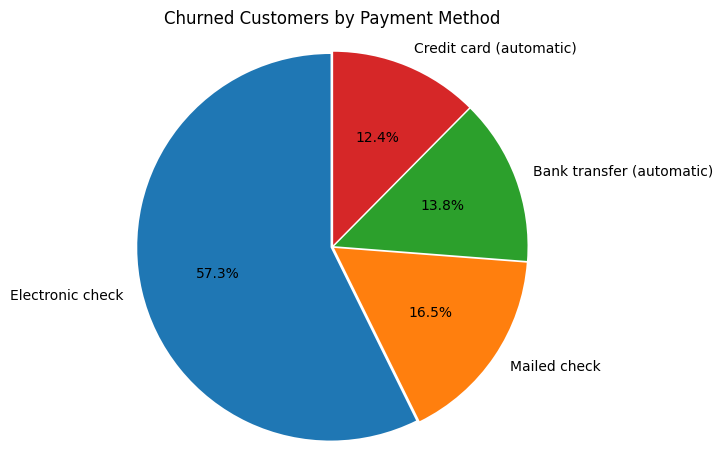

In [26]:
payment_method_counts = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts()

# Pie chart visualization
explode = [0.01] * len(payment_method_counts) 
plt.pie(
    payment_method_counts,
    labels=payment_method_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode
)
plt.title('Churned Customers by Payment Method')
plt.axis('equal')
plt.tight_layout()
plt.show()


### Observation
- **57.3%** of customers using the *Electronic Check* payment method switched to another company  
- **16.5%** of customers using the *Mailed Check* payment method switched to another company  
- **13.8%** of customers using the *Bank Transfer* payment method switched to another company  
- **12.4%** of customers using the *Credit Card* payment method switched to another company

## `MonthlyCharges`

🌈 **Suggested Color Pairings**
| Category | Color Name    | Color Purpose      |
|----------|---------------|--------------------|
| Churned  | `crimson`, `orange`, `darkred` | Highlights churned curve boldly |
| Stayed   | `royalblue`, `forestgreen`, `mediumseagreen` | Balances contrast with churned |

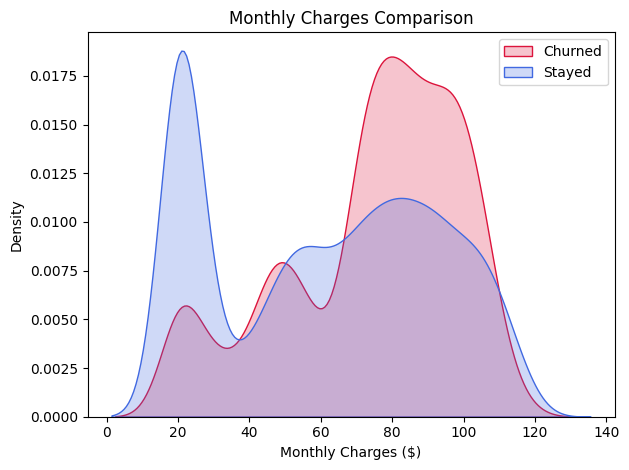

In [27]:
# KDE plot with distinct colors
sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], label='Churned', shade=True, color='crimson')
sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], label='Stayed', shade=True, color='royalblue')

# Add titles and legend
plt.title("Monthly Charges Comparison")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


### Key Takeaways ✨

* **Loyalty at Lower Cost:** A significant number of customers with **lower monthly charges (around \$20-30)** tend to stay with the company.
* **Churn Risk with Higher Bills:** Customers paying **higher monthly charges (especially \$70-100)** show a much higher tendency to churn. This is your high-risk segment!
* **Actionable Insight:** Focus retention efforts and understand pain points for customers with higher monthly bills – they are your most vulnerable group!

## `TotalCharges`

In [28]:
dfx=df.copy()

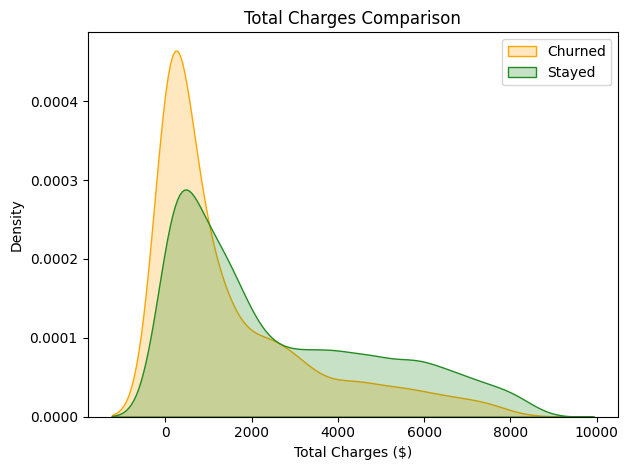

In [29]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

# KDE plot with distinct colors
sns.kdeplot(df[df['Churn'] == 'Yes']['TotalCharges'], label='Churned', shade=True, color='orange')
sns.kdeplot(df[df['Churn'] == 'No']['TotalCharges'], label='Stayed', shade=True, color='forestgreen')

# Add titles and legend
plt.title("Total Charges Comparison")
plt.xlabel("Total Charges ($)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

### Key Takeaways ✨

* **Early Exiters:** Customers with **low total charges (near \$0)** are highly prone to churning. They often leave soon after joining or before accumulating significant bills.
* **Long-Term Loyalty:** Customers with **higher total charges** are far more likely to stay. These are your established, valuable customers!
* **Strategic Focus:** Retention efforts should target new customers or those with low total spending, as they represent the highest churn risk.

## `Partner`

Partner
No     1200
Yes     669
Name: count, dtype: int64


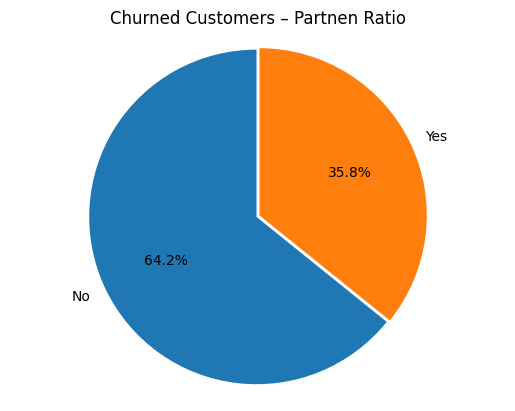

In [30]:
# Gender Counts
partner_counts = df[df['Churn'] == 'Yes']['Partner'].value_counts()
print(partner_counts)
explode = [0.01] * len(partner_counts)

# Create pie chart
plt.pie(partner_counts, labels=partner_counts.index, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Churned Customers – Partnen Ratio')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

### Key Takeaways ✨

* **No Partner, More Churn:** A significant **64.2%** of churned customers **do not have a partner**.
* **Partnered, Less Churn:** Only **35.8%** of churned customers **have a partner**.
* **Insight:** Customers without a partner are disproportionately represented among those who churn, suggesting they might be a higher-risk group.

# Data-Preprocessing

![image](assets/pre-processing.webp)

*Data preprocessing is the process of transforming raw data into a usable format for analysis and machine learning. It involves cleaning, transforming, and organizing data to improve its quality and suitability for further processing.*

**Key aspects of data preprocessing:***
- **Data Cleaning:** Addressing missing values, handling outliers, and correcting inconsistencies in the data.
- **Data Transformation:** Converting data into a suitable format for analysis, such as scaling numerical features or encoding categorical variables.
- **Data Integration:** Combining data from multiple sources into a unified dataset.
- **Data Reduction:** Data Compression, Data Sampling, Feature Selection.

## Data Cleaning
**Key Cleaning Steps:**

1.  **Fix Data Types:** Convert columns like `TotalCharges` from text to numbers, handling any errors.
2.  **Handle Missing Values:** Fill in gaps (e.g., with averages for numbers, or most common values for categories).
3.  **Drop Irrelevant Columns:** Remove IDs or other features that don't help your model predict.
4.  **Encode Categories:** Turn text-based categories (like 'Male'/'Female') into numbers (0s and 1s) that models understand.

---

**Outcome:** A clean, numerical dataset, perfectly primed for powerful machine learning!

### Fix Data Types

In [31]:
pass

### Handle Missing Values

In [32]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure_group         0
dtype: int64

In [33]:
null_index_list = df[df.isnull().any(axis=1)]['TotalCharges'].index.tolist()
null_index_list

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [34]:
# Step 1: Get null row indexes
null_rows = df[df['TotalCharges'].isnull()].index.tolist()

# Step 2: Use those to filter another DataFrame
dfx_nulls = dfx.loc[null_rows]

dfx_nulls['TotalCharges'] = dfx_nulls['MonthlyCharges']
dfx_nulls['TotalCharges']

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: TotalCharges, dtype: float64

In [35]:
# Fill missing TotalCharges with MonthlyCharges from the same row
df['TotalCharges'] = df.apply(
    lambda row: row['MonthlyCharges'] if pd.isnull(row['TotalCharges']) else row['TotalCharges'], 
    axis=1
)
df.isnull().sum().sum()

np.int64(0)

In [36]:
df.loc[null_index_list][['MonthlyCharges', 'TotalCharges']]

,MonthlyCharges,TotalCharges
488,52.55,52.55
753,20.25,20.25
936,80.85,80.85
1082,25.75,25.75
1340,56.05,56.05
3331,19.85,19.85
3826,25.35,25.35
4380,20.00,20.00
5218,19.70,19.70
6670,73.35,73.35


### Observation

---
- If a customer’s `tenure` is **0 months**, it means they **just signed up** or the account was created.
- Consequently, `TotalCharges` would naturally be **Monthly Charges**, because the customer only use that month.

```

## Data Transformation

**Why Transform Data?**

* **Algorithm Requirements:** Many ML algorithms perform best (or only work) with numerical data within specific ranges.
* **Performance Boost:** Scaling can help algorithms converge faster and prevent features with larger values from dominating the learning process.
* **Feature Engineering:** Creating new, more informative features from existing ones can significantly improve model accuracy.

---

**Key Transformation Techniques:**

* **Scaling:** Adjusting numerical features to a standard range (e.g., 0-1 or mean 0, std dev 1).
* **Encoding:** Converting categorical (text) data into numerical representations (e.g., One-Hot Encoding, Label Encoding).
* **Feature Engineering:** Crafting new features from raw data (e.g., `FamilySize` from `SibSp` and `Parch`).

### Features Extraction

In [37]:
numarical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
ordinal_features = ['Contract', 'tenure_group']
nominal_features = ['InternetService', 'PaymentMethod']
all_features = df.columns.tolist()

extra_features = numarical_features + ordinal_features + nominal_features + ['customerID', 'Churn']

# Remove numerical and ordinal features from the full list
binary_features = [col for col in all_features if col not in extra_features]
len(binary_features)

13

### Apply Ordianl Encoding into Binary Columns

In [38]:
# Define categories per feature
category_map = {
    'gender': ['Male', 'Female'],
    'Partner': ['No', 'Yes'],
    'Dependents': ['No', 'Yes'],
    'PhoneService': ['No', 'Yes'],
    'MultipleLines': ['No', 'Yes', 'No phone service'],
    'OnlineSecurity': ['No', 'Yes', 'No internet service'],
    
    'PhoneService': ['No', 'Yes'],
    'MultipleLines': ['No', 'Yes', 'No phone service'],
    'OnlineSecurity': ['No', 'Yes', 'No internet service'],
    'OnlineBackup': ['No', 'Yes', 'No internet service'],
    'DeviceProtection': ['No', 'Yes', 'No internet service'],
    'TechSupport': ['No', 'Yes', 'No internet service'],
    'StreamingTV': ['No', 'Yes', 'No internet service'],
    'StreamingMovies': ['No', 'Yes', 'No internet service'],
    'PaperlessBilling': ['No', 'Yes']
}

def fix_data_type(data_series):
    if data_series.dtype == 'object':
        col_name = data_series.name
        if col_name in category_map:
            oe = OrdinalEncoder(categories=[category_map[col_name]], dtype=np.int32)
            transformed_data = oe.fit_transform(data_series.values.reshape(-1, 1))
            return transformed_data.flatten()
    return data_series

df_cleaned = df.copy()
for col in binary_features:
    if col in df_cleaned.columns:
        df_cleaned[col] = fix_data_type(df_cleaned[col])

### Apply Ordinal Encoding into Ordinal Columns

In [39]:
# Apply Ordinal Encoding in Contract and Tenure_Group 

# Encode 'Contract'
oe_contract = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']], dtype=np.int64)
df_cleaned['Contract'] = oe_contract.fit_transform(df_cleaned[['Contract']])

# Encode 'tenure_group'
oe_tenure = OrdinalEncoder(categories=[['<1yr', '1st_Year', '2nd_Year', '3rd_Year', '4th_Year', '5th_Year','6th_Year']], dtype=np.int64)
df_cleaned['tenure_group'] = oe_tenure.fit_transform(df_cleaned[['tenure_group']])


### Label Encoding into Output Columns

In [40]:
# Label Encoding 'Churn'
le = LabelEncoder()
df_cleaned['Churn'] = le.fit_transform(df_cleaned['Churn'])

### One-Hot-Encoding into Nominal Columns

In [41]:
# Initialize encoder
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32)

# InternetService
internet_encoded = ohe.fit_transform(df_cleaned[['InternetService']])
internet_cols = ohe.get_feature_names_out(['InternetService'])
df_internet_encoded = pd.DataFrame(internet_encoded, columns=internet_cols, index=df_cleaned.index)

# PaymentMethod
payment_encoded = ohe.fit_transform(df_cleaned[['PaymentMethod']])
payment_cols = ohe.get_feature_names_out(['PaymentMethod'])
df_payment_encoded = pd.DataFrame(payment_encoded, columns=payment_cols, index=df_cleaned.index)

# Drop original columns and concatenate new ones
df_cleaned = df_cleaned.drop(columns=['InternetService', 'PaymentMethod'])
df_cleaned = pd.concat([df_cleaned, df_internet_encoded, df_payment_encoded], axis=1)


In [42]:
df_cleaned.sample(3).T

,6988,2879,339
customerID,1684-FLBGS,4550-VBOFE,1343-EHPYB
gender,1,0,0
SeniorCitizen,0,1,0
Partner,1,1,1
Dependents,1,0,0
tenure,23,70,63
PhoneService,1,1,1
MultipleLines,1,1,1
OnlineSecurity,0,0,0
OnlineBackup,1,1,1


### Deal with Outliers

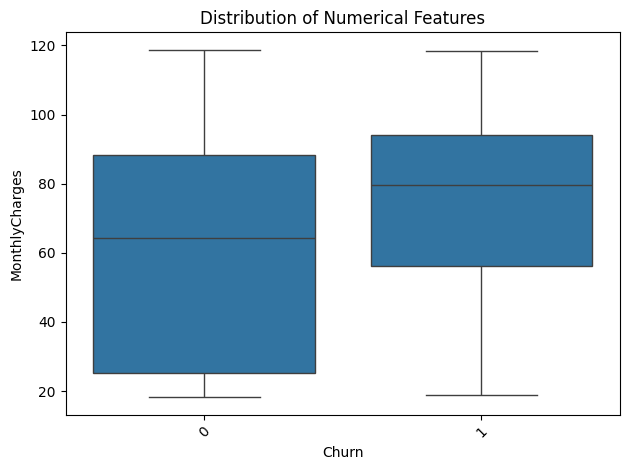

In [43]:
# Select numerical columns
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Plot boxplot for all numerical features
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_cleaned)
plt.title("Distribution of Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- Outlier Detection ---

1. Visual Inspection (Box Plots):


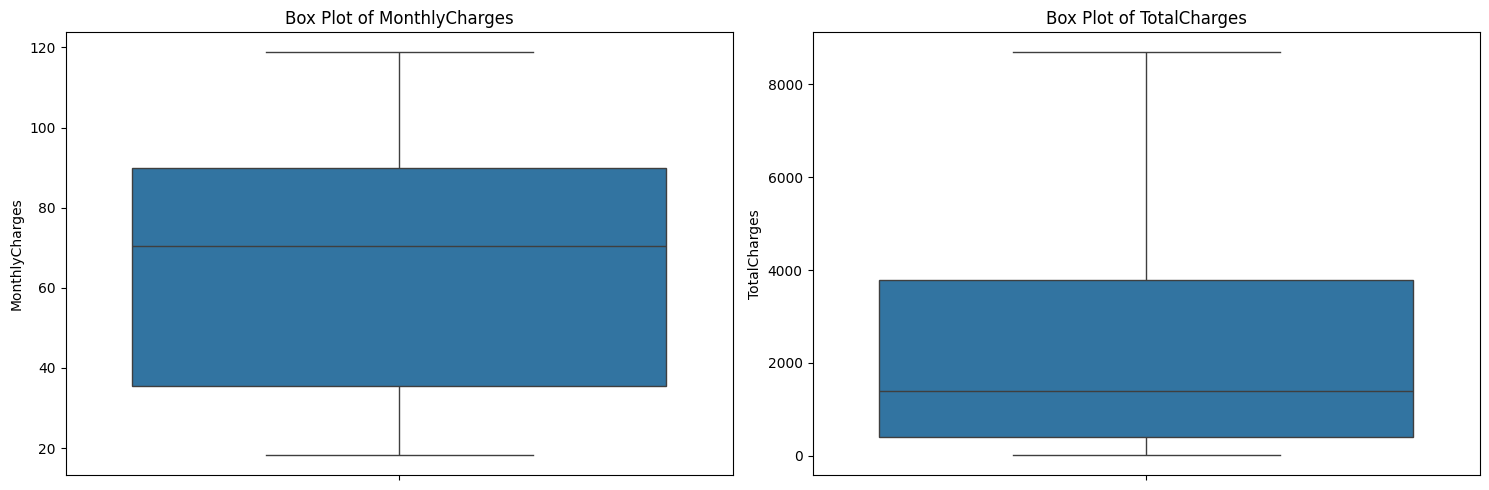

Observations from Box Plots:
- 'tenure': Looks like there aren't many extreme outliers, mostly a continuous range.
- 'MonthlyCharges': Appears to have a fairly even distribution, no obvious extreme outliers.
- 'TotalCharges': Shows some potential outliers on the higher end, as the whisker ends before the absolute maximum.

2. Statistical Method (IQR):

--- MonthlyCharges ---
  Q1: 35.50
  Q3: 89.85
  IQR: 54.35
  Lower Bound (Outlier Threshold): -46.02
  Upper Bound (Outlier Threshold): 171.38
  Number of Outliers: 0
  Percentage of Outliers: 0.00%
  No outliers detected by IQR method for this column.

--- TotalCharges ---
  Q1: 398.55
  Q3: 3786.60
  IQR: 3388.05
  Lower Bound (Outlier Threshold): -4683.52
  Upper Bound (Outlier Threshold): 8868.67
  Number of Outliers: 0
  Percentage of Outliers: 0.00%
  No outliers detected by IQR method for this column.

--- Overall Conclusion on Outliers ---
For 'tenure' and 'MonthlyCharges', outliers are typically rare or not significantly proble

In [44]:
# Define numerical features for outlier detection
numerical_features = ['MonthlyCharges', 'TotalCharges']

print("--- Outlier Detection ---")

# 1. Visual Inspection using Box Plots
print("\n1. Visual Inspection (Box Plots):")
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("Observations from Box Plots:")
print("- 'tenure': Looks like there aren't many extreme outliers, mostly a continuous range.")
print("- 'MonthlyCharges': Appears to have a fairly even distribution, no obvious extreme outliers.")
print("- 'TotalCharges': Shows some potential outliers on the higher end, as the whisker ends before the absolute maximum.")


# 2. Statistical Method: IQR Method
print("\n2. Statistical Method (IQR):")
outlier_summary = {}

for col in numerical_features:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(df_cleaned)) * 100

    outlier_summary[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': num_outliers,
        'Percentage of Outliers': percentage_outliers
    }

    print(f"\n--- {col} ---")
    print(f"  Q1: {Q1:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Lower Bound (Outlier Threshold): {lower_bound:.2f}")
    print(f"  Upper Bound (Outlier Threshold): {upper_bound:.2f}")
    print(f"  Number of Outliers: {num_outliers}")
    print(f"  Percentage of Outliers: {percentage_outliers:.2f}%")

    if num_outliers > 0:
        print(f"  Sample Outliers (first 5):")
        print(outliers[[col]].head())
    else:
        print("  No outliers detected by IQR method for this column.")

# General conclusion based on typical Telco dataset:
print("\n--- Overall Conclusion on Outliers ---")
print("For 'tenure' and 'MonthlyCharges', outliers are typically rare or not significantly problematic.")
print("For 'TotalCharges', there might be a few outliers on the higher end, but given its correlation with 'tenure' and 'MonthlyCharges', these might represent valid long-term, high-value customers rather than errors.")
print("Decision on handling outliers (remove, cap, transform) depends on their nature and impact on model performance.")

#### Observation
- There are No Outlier in Numarical Columns

## Data Scaling

**Why Scale?**

* **Fair Play:** Prevents features with wide ranges (e.g., `TotalCharges`) from overpowering features with small ranges (e.g., `tenure`).
* **Faster Training:** Helps algorithms (especially those using gradient descent) learn more efficiently.
* **Improved Performance:** Essential for distance-based algorithms like KNN and SVM.

---

**Common Methods:**

* **Standardization (Z-score):** Rescales data to have a mean of 0 and a standard deviation of 1. Great for many models and less sensitive to outliers.
* **Min-Max Scaling (Normalization):** Scales data to a fixed range, usually 0 to 1.

---

In [45]:
df_cleaned[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80


### Distribution Checking

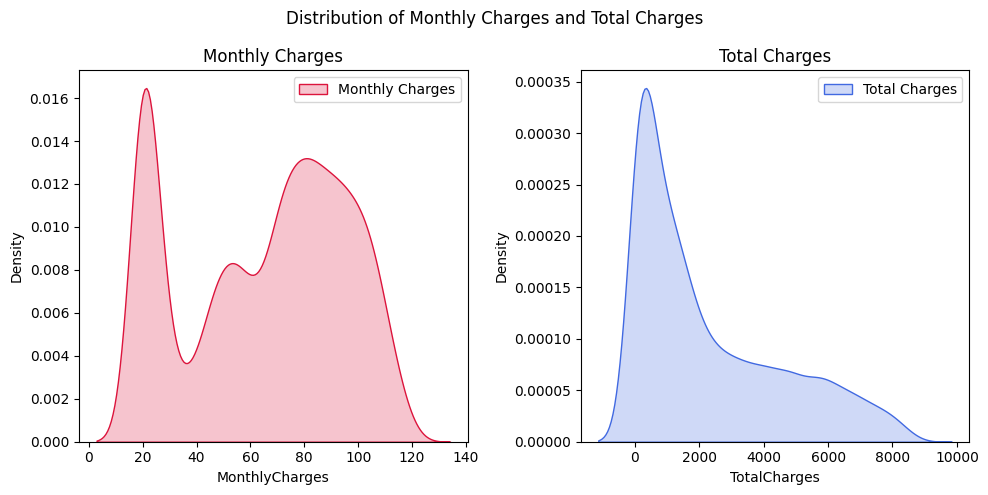

In [46]:
# Create a subplot with 1 row, 2 columns
figure, axes = plt.subplots(1, 2, figsize=(10, 5))
figure.suptitle('Distribution of Monthly Charges and Total Charges')

# Monthly Charges KDE
sns.kdeplot(df_cleaned['MonthlyCharges'], label='Monthly Charges', shade=True, color='crimson', ax=axes[0])
axes[0].set_title("Monthly Charges")
axes[0].legend()

# Total Charges KDE
sns.kdeplot(df_cleaned['TotalCharges'], label='Total Charges', shade=True, color='royalblue', ax=axes[1])
axes[1].set_title("Total Charges")
axes[1].legend()

plt.tight_layout()
plt.show()


In [47]:
df_cleaned[numerical_features].skew()

MonthlyCharges   -0.220524
TotalCharges      0.963316
dtype: float64

In [48]:
df_cleaned[numerical_features].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651182
TotalCharges,0.651182,1.000000


### Summary
- **Monthly Charges:** Apply Standard Scaling (`StandardScaler`) or Min-Max Scaling (`MinMaxScaler`).
- **Total Charges:** Apply a Logarithmic Transformation (`np.log1p` or `np.log`) followed by Standard Scaling or Min-Max Scaling.

### `MonthlyCharges`

In [49]:
scaler = StandardScaler()
df_cleaned['MonthlyCharges'] = scaler.fit_transform(df_cleaned['MonthlyCharges'].values.reshape(-1, 1))
# .values.reshape(-1, 1) is needed because StandardScaler expects a 2D array

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

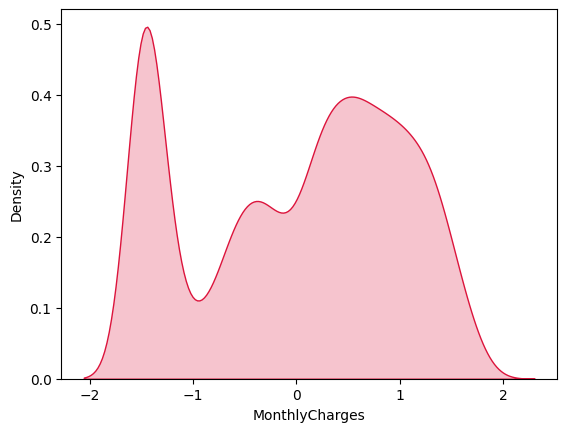

In [50]:
sns.kdeplot(df_cleaned['MonthlyCharges'], label='Monthly Charges', shade=True, color='crimson')

### `TotalCharges`

In [51]:
df_cleaned['TotalCharges'].min()

np.float64(18.8)

In [52]:
df_cleaned['TotalCharges'] = np.log(df_cleaned['TotalCharges'])

<Axes: xlabel='TotalCharges', ylabel='Density'>

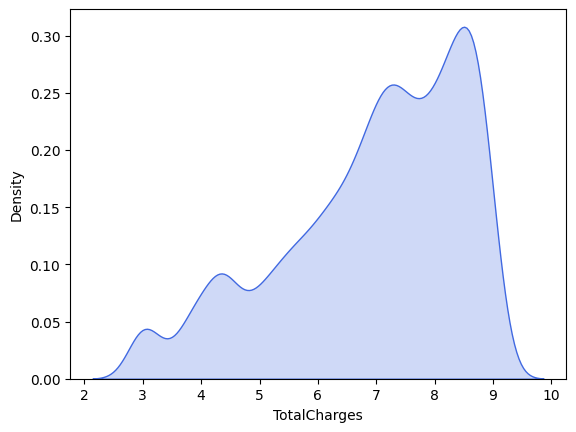

In [53]:
sns.kdeplot(df_cleaned['TotalCharges'], label='Total Charges', shade=True, color='royalblue')

In [54]:
df_cleaned[numerical_features].skew()

MonthlyCharges   -0.220524
TotalCharges     -0.752664
dtype: float64

In [55]:
df_cleaned[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,-6.406285e-17,1.000071,-1.545860,-0.972540,0.185733,0.833833,1.794352
TotalCharges,7043.0,6.934215e+00,1.557777,2.933857,5.987833,7.240327,8.239224,9.069330


## Data Integration

**Why It's Crucial:**

* **Holistic View:** Combines numerical, binary, and nominal features into a single matrix.
* **Model Ready:** Creates the unified input format that ML algorithms expect.
* **Consistency:** Ensures all features are aligned and ready for training.

In [56]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int32  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int32  
 4   Dependents                             7043 non-null   int32  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int32  
 7   MultipleLines                          7043 non-null   int32  
 8   OnlineSecurity                         7043 non-null   int32  
 9   OnlineBackup                           7043 non-null   int32  
 10  DeviceProtection                       7043 non-null   int32  
 11  Tech

In [57]:
df_cleaned['Family_Members'] = df_cleaned['Partner'] + df_cleaned['Dependents']

## Data Reduction

**Why Reduce Data?**

* **Faster Training:** Smaller datasets mean quicker model training times.
* **Better Performance:** Reduces noise and redundancy, potentially improving model accuracy.
* **Resource Efficiency:** Less memory and computational power needed.
* **Visualization:** Easier to visualize high-dimensional data when reduced.

---

**Key Techniques:**

* **Dimensionality Reduction:** Reducing the number of features (columns).
    * **Feature Selection:** Choosing the most relevant features.
    * **Feature Extraction:** Creating new, fewer features from existing ones (e.g., PCA).
* **Numerosity Reduction:** Reducing the number of data points (rows).
    * **Sampling:** Selecting a representative subset of data.
    * **Data Aggregation:** Summarizing data (e.g., averages).

---

**Outcome:** A leaner, more efficient dataset that's optimized for machine learning!

### Drop Columns

In [58]:
df_backup2 = df_cleaned.copy()

In [59]:
drop_columns_list = ['customerID', 'Partner', 'Dependents', 'tenure']
df_cleaned.drop(columns=drop_columns_list, axis=1, inplace=True)

In [60]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int32  
 1   SeniorCitizen                          7043 non-null   int64  
 2   PhoneService                           7043 non-null   int32  
 3   MultipleLines                          7043 non-null   int32  
 4   OnlineSecurity                         7043 non-null   int32  
 5   OnlineBackup                           7043 non-null   int32  
 6   DeviceProtection                       7043 non-null   int32  
 7   TechSupport                            7043 non-null   int32  
 8   StreamingTV                            7043 non-null   int32  
 9   StreamingMovies                        7043 non-null   int32  
 10  Contract                               7043 non-null   int64  
 11  Pape

In [61]:
df_cleaned['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

**Imbalance Dataset**
- **Balance Need**

# Split-Data

![train_test_split](assets/train_test_split.webp)
*A train/test/validation split is a crucial technique in machine learning where a dataset is divided into three subsets: training, testing, and validation sets*
- Train
- Test
- Validation



In [62]:
df_cleaned.shape

(7043, 22)

## X, y Separate

In [63]:
X = df_cleaned.drop(columns=['Churn'])
y = df_cleaned['Churn']

## Balance Dataset using `SMOTE`

In [64]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [65]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [66]:
y_resampled.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

## Train-Temp Separate

In [67]:
# First split: 60% train, 40% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_resampled, y_resampled, test_size=0.4, random_state=42, stratify=y_resampled
)

## Test-Validation Separate

In [68]:
# Second split: 50% of temp → 20% validation, 20% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [69]:
X_train.shape, X_val.shape, X_test.shape

((6208, 21), (2070, 21), (2070, 21))

# Machine-Learning-Model
![machine-learning image](assets/machine-learning.jpg)
*A machine learning model is a program that learns from data to make predictions or decisions about new, unseen data*

---

🎯 **Baseline & Interpretable Models**
These are great for understanding relationships and feature importance:
- **Logistic Regression** (with class weighting) — interpretable and fast
- **Decision Tree Classifier** — visualizable, but may overfit
- **K-Nearest Neighbors (KNN)** – Simple and intuitive, but sensitive to feature scaling
- **Naive Bayes** — good with categorical features, though assumptions might limit accuracy

---

⚡️ **Ensemble Models (often best for tabular churn data)**
Robust, non-linear models ideal for high accuracy:
- **Stacking or Voting Classifiers** – Combine multiple models for better performance
- **Random Forest Classifier**
- **Gradient Boosting Machines (GBM)**
- **XGBoost** — popular in competitions, very tunable
- **LightGBM** — faster with large datasets
- **CatBoost** — handles categorical variables natively

---

🧠 **Advanced / Non-linear Models**
More flexible, but less interpretable:
- **Support Vector Machine (SVM)** — effective on smaller datasets with good feature scaling
- **Neural Network (MLPClassifier or Keras/TensorFlow)** — for learning complex patterns, especially if you have many features

🔍 **How to Interpret**
| Scenario                  | Interpretation         |
|---------------------------|------------------------|
| Train ≫ Test Accuracy     | Likely overfitting     |
| Train ≈ Test Accuracy     | Well-balanced model    |
| Train & Test both low     | Possible underfitting  |

## Usefull Functions

In [70]:
def plot_roc_auc(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_proba)
    print("ROC AUC Score:", auc_score)

    # Plotting the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

### ROC-AUC Curve

## Logistic Regression

In [71]:
model1 = LogisticRegression(
    solver = 'liblinear',
    penalty = 'l1',
    max_iter = 1000,
    random_state = 42
)
model1.fit(X_train, y_train)
model1_train_pred = model1.predict(X_train)
model1_val_pred = model1.predict(X_val)

# Accuracy on training set
train_accuracy1 = accuracy_score(y_train, model1_train_pred)
print(f"Train Accuracy: {train_accuracy1:.2f}")

# Accuracy on test set
val_accuracy1 = accuracy_score(y_val, model1_val_pred)
print(f"Validation Accuracy: {val_accuracy1:.2f}")


Train Accuracy: 0.81
Validation Accuracy: 0.82


### Confusion Matrix

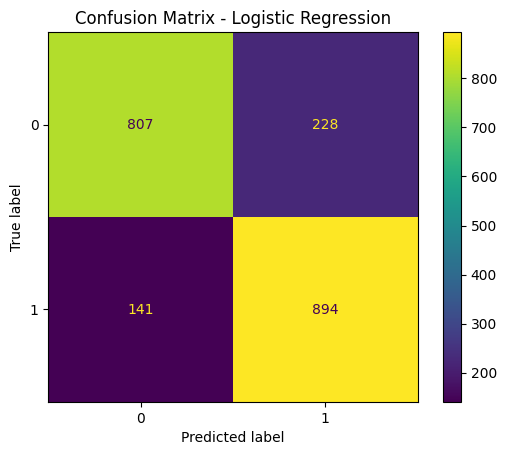

In [72]:
ConfusionMatrixDisplay.from_predictions(y_val, model1_val_pred)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Classification Report

In [73]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, model1_val_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1035
           1       0.80      0.86      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



### ROC-AUC Score

ROC AUC Score: 0.9057929006511238


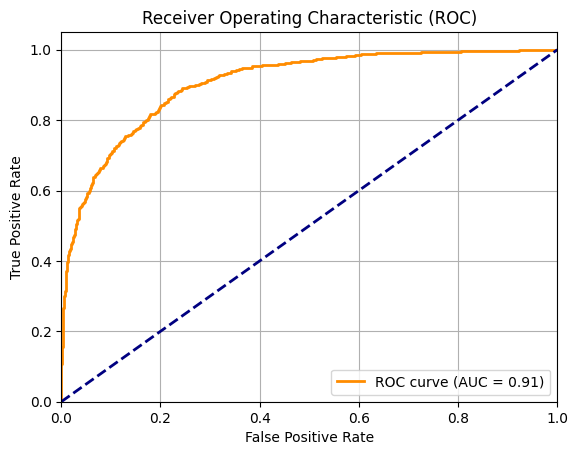

In [74]:
# Print ROC AUC Score
plot_roc_auc(model1, X_val, y_val)

**Which type of error should be minimized for this dataset and why?**
- For the Telco Customer Churn dataset, the type of error you should primarily aim to minimize is False Negatives (`Type II errors`).

**In summary:**
* **For the business goal of churn prediction (minimizing lost customers):** Focus primarily on the **Recall of Class 1 (0.85)**. This tells you how many actual churners your model is successfully identifying.
* **For a balanced view of the model's effectiveness on the churn class:** The **F1-score of Class 1 (0.81)** is excellent.
* **For overall model performance (given balanced classes):** The **Accuracy (0.81)** is a good general metric.


## K-Nearest Neighbors (KNN)
*The k-Nearest Neighbors (KNN) algorithm is a supervised machine learning method used for both classification and regression. It's a "lazy learning" algorithm, meaning it stores all the training data and classifies new data points based on similarity to their neighbors.*

In [75]:
model2 = KNeighborsClassifier(
    n_neighbors = 5,
    weights = 'uniform' 
)
model2.fit(X_train, y_train)
model2_train_pred = model2.predict(X_train)
model2_val_pred = model2.predict(X_val)

# Accuracy on training set
train_accuracy2 = accuracy_score(y_train, model2_train_pred)
print(f"Train Accuracy: {train_accuracy2:.2f}")

# Accuracy on test set
val_accuracy2 = accuracy_score(y_val, model2_val_pred)
print(f"Validation Accuracy: {val_accuracy2:.2f}")


Train Accuracy: 0.86
Validation Accuracy: 0.80


### Confusion Matrix

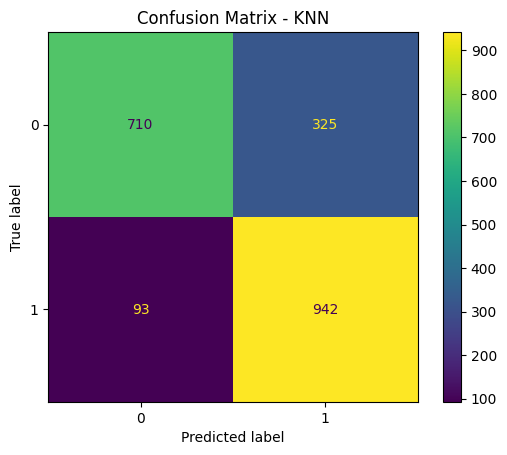

In [76]:
ConfusionMatrixDisplay.from_predictions(y_val, model2_val_pred)
plt.title("Confusion Matrix - KNN")
plt.show()

### Classification Report

In [77]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, model2_val_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      1035
           1       0.74      0.91      0.82      1035

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



### ROC-AUC Curve

ROC AUC Score: 0.8695180751009359


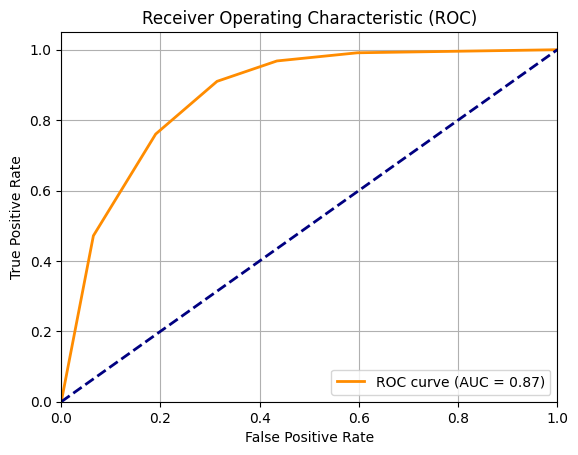

In [78]:
# Print ROC AUC Score
plot_roc_auc(model2, X_val, y_val)

## Naive Bayes

![image](assets/naive-bayes.png)

**How it Works:**

1.  **Probability Calculation:** It calculates the probability of each class (e.g., "Churn" or "Not Churn") given the values of the input features.
2.  **"Naive" Assumption:** It assumes that the presence of one feature does not affect the presence of any other feature. For example, it assumes a customer's `PhoneService` is independent of their `InternetService` when predicting churn, even if they might be related in reality.
3.  **Maximum Probability:** The algorithm predicts the class that has the highest calculated probability.

---

**Key Strengths:**

* **Fast:** Incredibly quick to train and make predictions.
* **Scalable:** Works well with large datasets.
* **Good for Text:** Often used in natural language processing (NLP) tasks like spam detection and sentiment analysis.
* **Simple:** Easy to understand and implement.

---

**Limitations:**

* **"Naive" Assumption:** The independence assumption is rarely true in real-world data, which can sometimes limit its accuracy.
* **Zero Frequency Problem:** If a category in the test data wasn't seen in the training data, the model might assign a zero probability, leading to issues. (This is often handled with smoothing techniques).

**Main Types of Naive Bayes Classifier**

- **Bernoulli Naive Bayes:** Suited for binary/boolean features. It assumes each feature is a binary-valued (`0/1`) variable.
- **Multinomial Naive Bayes:** Typically used for discrete counts. It’s often used in text classification, where features might be word counts.
- **Gaussian Naive Bayes:** Assumes that continuous features follow a `normal distribution`.

**Bernoulli* NB assumes `binary data`, *Multinomial NB* works with `discrete counts`, and *Gaussian NB* handles `continuous data` assuming a normal distribution*

![image](assets/nb.webp)

>Python
```python 
class sklearn.naive_bayes.BernoulliNB(*, alpha=1.0, force_alpha=True, binarize=0.0, fit_prior=True, class_prior=None)[source]
```

In [79]:
model3 = BernoulliNB(
    alpha=5.0,
    force_alpha=True,
    fit_prior=True,
)
model3.fit(X_train, y_train)
model3_train_pred = model3.predict(X_train)
model3_val_pred = model3.predict(X_val)

# Accuracy on training set
train_accuracy3 = accuracy_score(y_train, model3_train_pred)
print(f"Train Accuracy: {train_accuracy3:.2f}")

# Accuracy on test set
val_accuracy3 = accuracy_score(y_val, model3_val_pred)
print(f"Validation Accuracy: {val_accuracy3:.2f}")

Train Accuracy: 0.78
Validation Accuracy: 0.78


### Confusion Matrix

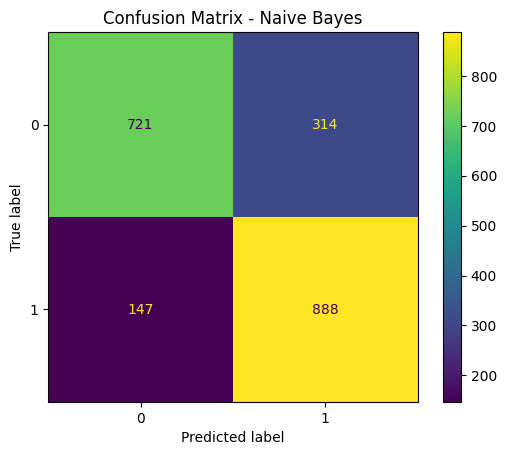

In [80]:
ConfusionMatrixDisplay.from_predictions(y_val, model3_val_pred)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

### Classification Report

In [81]:
# Print classification report
print("Classification Report - Naive Bayes")
print(classification_report(y_val, model3_val_pred))

Classification Report - Naive Bayes
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1035
           1       0.74      0.86      0.79      1035

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



### ROC-AUC Score

ROC AUC Score: 0.843704170459054


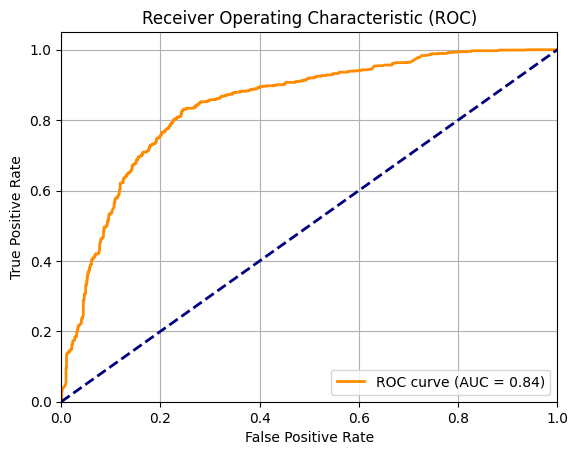

In [82]:
# Print ROC AUC Score
plot_roc_auc(model3, X_val, y_val)

## Decision Tree

![image](assets/dt.png)

- *A Decision Tree is a powerful and intuitive machine learning algorithm that mimics human decision-making. It builds a tree-like structure where each internal "node" is a test on a feature, each "branch" is the outcome of the test, and each "leaf node" is a class label (the final decision).*

>Python
```python
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)[source]

```

In [83]:
model4 = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 5,
)
model4.fit(X_train, y_train)
model4_train_pred = model4.predict(X_train)
model4_val_pred = model4.predict(X_val)

# Accuracy on training set
train_accuracy4 = accuracy_score(y_train, model4_train_pred)
print(f"Train Accuracy: {train_accuracy4:.2f}")

# Accuracy on test set
val_accuracy4 = accuracy_score(y_val, model4_val_pred)
print(f"Validation Accuracy: {val_accuracy4:.2f}")

Train Accuracy: 0.79
Validation Accuracy: 0.78


### Confusion Matrix

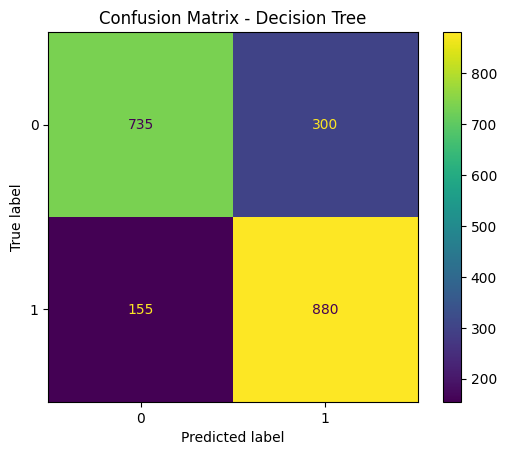

In [84]:
ConfusionMatrixDisplay.from_predictions(y_val, model4_val_pred)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

### Classification Report

In [85]:
# Print classification report
print("Classification Report - Decision Tree")
print(classification_report(y_val, model4_val_pred))

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      1035
           1       0.75      0.85      0.79      1035

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070



### ROC-AUC Score

ROC AUC Score: 0.8506042148008122


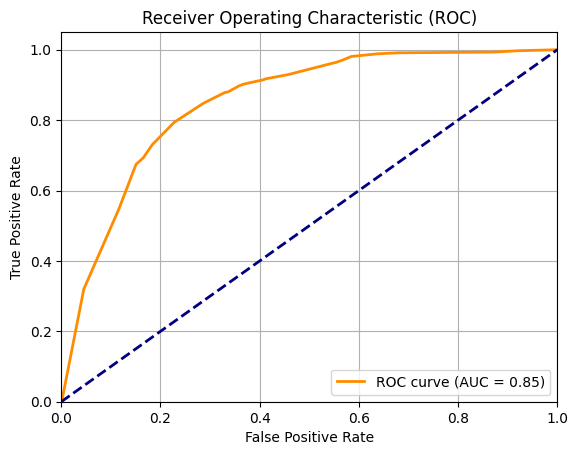

In [86]:
# Print ROC AUC Score
plot_roc_auc(model4, X_val, y_val)

## Stacking

![image](assets/stacking.png)

- **Stacking** (short for Stacked Generalization) is an advanced ensemble learning technique that combines predictions from **multiple diverse models** (called "base models") to make a final, more robust prediction. Think of it as training a "meta-learner" to intelligently weigh the opinions of other models.

>Python
```python
sklearn.ensemble.StackingClassifier(estimators, final_estimator=None, *, cv=None, stack_method='auto', n_jobs=None, passthrough=False, verbose=0)

```

In [87]:
clf1 = LogisticRegression(solver='liblinear', penalty='l2')
clf2 = DecisionTreeClassifier(max_depth = 5)
clf3 = KNeighborsClassifier(n_neighbors = 5)
clf4 = RandomForestClassifier(n_estimators=500, max_depth=5)
clf5 = SVC()
clf6 = MLPClassifier()

estimators = [('LogisticRegression', clf1), ('Decision Tree', clf2), ('KNN', clf3), 
              ('Random Forest', clf4), ('SVC', clf5), ('MLP Classifier', clf6)]

In [88]:
model5 = StackingClassifier(
    estimators = estimators,
    final_estimator = clf4,
    cv=5,
    n_jobs = -1
)
model5.fit(X_train, y_train)
model5_train_pred = model5.predict(X_train)
model5_val_pred = model5.predict(X_val)

# Accuracy on training set
train_accuracy5 = accuracy_score(y_train, model5_train_pred)
print(f"Train Accuracy: {train_accuracy5:.2f}")

# Accuracy on test set
val_accuracy5 = accuracy_score(y_val, model5_val_pred)
print(f"Validation Accuracy: {val_accuracy5:.2f}")

Train Accuracy: 0.86
Validation Accuracy: 0.82


### Confusion Matrix

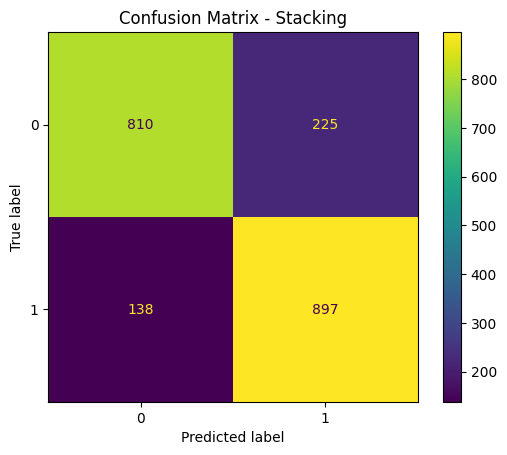

In [89]:
ConfusionMatrixDisplay.from_predictions(y_val, model5_val_pred)
plt.title("Confusion Matrix - Stacking")
plt.show()

### Classification Report

In [90]:
# Print classification report
print("Classification Report - Stacking")
print(classification_report(y_val, model5_val_pred))

Classification Report - Stacking
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1035
           1       0.80      0.87      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.83      0.82      0.82      2070
weighted avg       0.83      0.82      0.82      2070



### ROC-AUC Score

ROC AUC Score: 0.9026198977805784


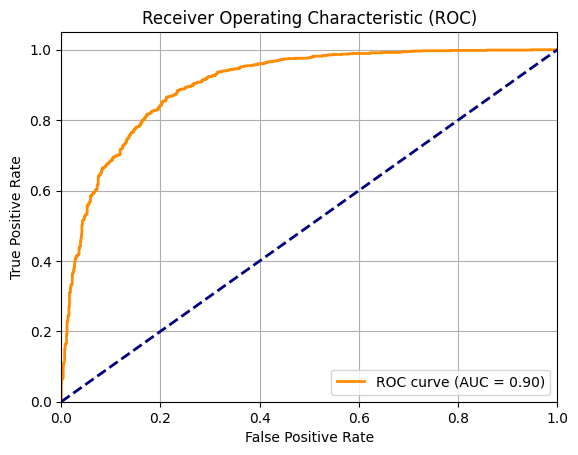

In [91]:
# Print ROC AUC Score
plot_roc_auc(model5, X_val, y_val)

## Random Forest: The "Wisdom of Crowds" for Data 🌳🌲


![image](assets/rf.png)

- *Random Forest is a highly popular and powerful ensemble learning technique for both classification and regression. Instead of relying on a single decision tree, it builds a "forest" of many individual decision trees and combines their predictions to make a more accurate and stable final decision.*

>Python
```python
sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
```

In [92]:
model6 = RandomForestClassifier(
    n_estimators = 300,
    criterion='gini',
    max_depth=5
)
model6.fit(X_train, y_train)
model6_train_pred = model6.predict(X_train)
model6_val_pred = model6.predict(X_val)

# Accuracy on training set
train_accuracy6 = accuracy_score(y_train, model6_train_pred)
print(f"Train Accuracy: {train_accuracy6:.2f}")

# Accuracy on test set
val_accuracy6 = accuracy_score(y_val, model6_val_pred)
print(f"Validation Accuracy: {val_accuracy6:.2f}")

Train Accuracy: 0.80
Validation Accuracy: 0.80


### Confusion Matrix

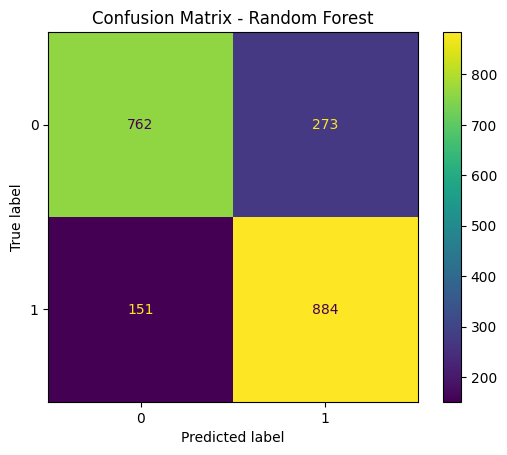

In [93]:
ConfusionMatrixDisplay.from_predictions(y_val, model6_val_pred)
plt.title("Confusion Matrix - Random Forest")
plt.show()

### Classification Report

In [94]:
# Print classification report
print("Classification Report - Random Forest")
print(classification_report(y_val, model6_val_pred))

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1035
           1       0.76      0.85      0.81      1035

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.79      2070
weighted avg       0.80      0.80      0.79      2070



### ROC-AUC Score

ROC AUC Score: 0.869663702770193


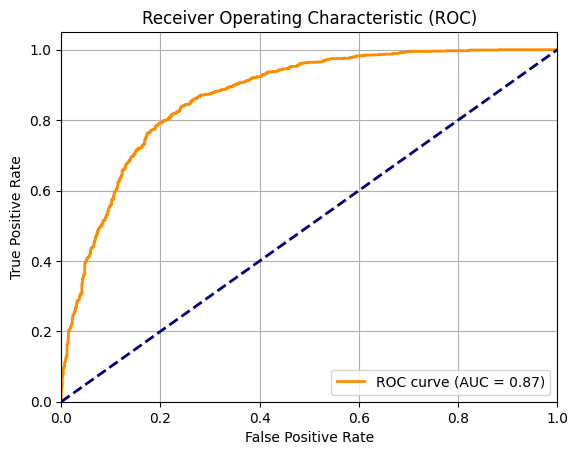

In [95]:
# Print ROC AUC Score
plot_roc_auc(model6, X_val, y_val)

## Gradient Boosting: Learning from Mistakes 📈

![image](assets/gb.png)

- **Gradient Boosting** is a cutting-edge **ensemble learning* technique that builds a strong predictive model by combining many *weak* prediction models (typically shallow decision trees) in a sequential, iterative way. Unlike Random Forest, it focuses on correcting errors made by previous models.

>Python
```python

sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

```

In [96]:
model7 = GradientBoostingClassifier(
    loss = 'log_loss',
    n_estimators = 300,
    criterion='friedman_mse',
    max_depth=5
)
model7.fit(X_train, y_train)
model7_train_pred = model7.predict(X_train)
model7_val_pred = model7.predict(X_val)

# Accuracy on training set
train_accuracy7 = accuracy_score(y_train, model7_train_pred)
print(f"Train Accuracy: {train_accuracy7:.2f}")

# Accuracy on test set
val_accuracy7 = accuracy_score(y_val, model7_val_pred)
print(f"Validation Accuracy: {val_accuracy7:.2f}")

Train Accuracy: 0.95
Validation Accuracy: 0.82


### Confusion Matrix

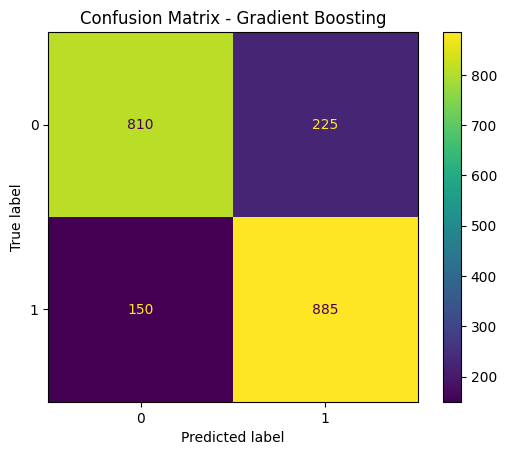

In [97]:
ConfusionMatrixDisplay.from_predictions(y_val, model7_val_pred)
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

### Classification Report

In [98]:
# Print classification report
print("Classification Report - Gradient Boosting")
print(classification_report(y_val, model7_val_pred))

Classification Report - Gradient Boosting
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1035
           1       0.80      0.86      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



### ROC-AUC Score

ROC AUC Score: 0.8949109664169524


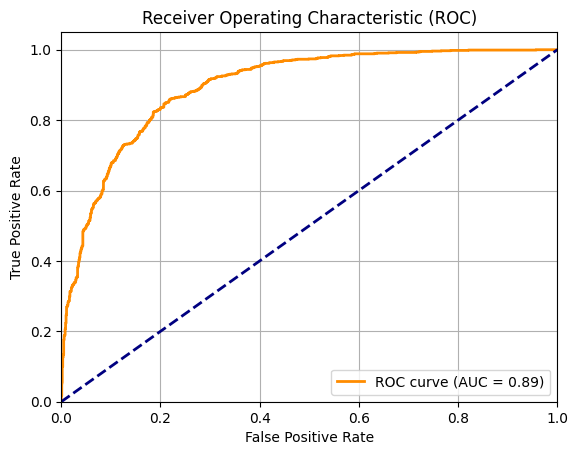

In [99]:
# Print ROC AUC Score
plot_roc_auc(model7, X_val, y_val)

## XGBoost: The Performance Powerhouse 🚀

![Image](assets/xgb.webp)
- **XGBoost** (eXtreme Gradient Boosting) is a highly optimized and widely acclaimed implementation of the **Gradient Boosting** algorithm. It's renowned for its *speed*, *performance*, and *scalability*, making it a go-to choice for winning machine learning competitions and solving complex real-world problems.

**⚙️ General Parameters**
These control the overall behavior of the model.

| Parameter         | Description                                      | Example Values        |
|------------------|--------------------------------------------------|------------------------|
| `booster`         | Type of booster to use                          | `'gbtree'`, `'dart'`   |
| `n_estimators`    | Number of boosting rounds                       | `100`, `500`, `1000`   |
| `verbosity`       | Controls logging output                         | `0` (silent) to `3`    |
| `n_jobs`          | Number of parallel threads                      | `-1` (use all cores)   |
| `random_state`    | Seed for reproducibility                        | `42`, `0`, `None`      |

---

**🌲 Tree Booster Parameters (`booster='gbtree'` or `'dart'`)**

| Parameter           | Description                                      | Example Values        |
|--------------------|--------------------------------------------------|------------------------|
| `max_depth`         | Max depth of each tree                          | `3` to `10`            |
| `learning_rate`     | Step size shrinkage (aka `eta`)                 | `0.01`, `0.1`, `0.3`   |
| `subsample`         | Fraction of samples per tree                    | `0.5` to `1.0`         |
| `colsample_bytree`  | Fraction of features per tree                   | `0.5` to `1.0`         |
| `colsample_bylevel` | Fraction of features per level                  | `0.5` to `1.0`         |
| `colsample_bynode`  | Fraction of features per split                  | `0.5` to `1.0`         |
| `gamma`             | Minimum loss reduction for split                | `0`, `1`, `5`          |
| `min_child_weight`  | Minimum sum of instance weight in child         | `1`, `5`, `10`         |
| `reg_alpha`         | L1 regularization term                          | `0`, `0.1`, `1`        |
| `reg_lambda`        | L2 regularization term                          | `1`, `5`, `10`         |
| `scale_pos_weight`  | Balancing positive/negative classes             | `1`, `3`, `5`          |

---

🧠 **Learning Task Parameters**

| Parameter         | Description                                      | Example Values        |
|------------------|--------------------------------------------------|------------------------|
| `objective`       | Learning task type                              | `'binary:logistic'`, `'multi:softprob'` |
| `eval_metric`     | Evaluation metric                               | `'logloss'`, `'auc'`, `'error'`         |
| `num_class`       | Number of classes (for multiclass)              | `3`, `5`, `10`         |

---

🎯 **Dart Booster Parameters (`booster='dart'` only)**

| Parameter         | Description                                      | Example Values        |
|------------------|--------------------------------------------------|------------------------|
| `sample_type`     | Sampling method                                 | `'uniform'`, `'weighted'` |
| `normalize_type`  | Normalization method                            | `'tree'`, `'forest'`   |
| `rate_drop`       | Dropout rate                                    | `0.1`, `0.3`           |
| `skip_drop`       | Probability of skipping dropout                 | `0.1`, `0.5`           |

---

We can find the full list of parameters in [XGBoost’s official documentation](https://xgboost.readthedocs.io/en/stable/parameter.html), which includes advanced options like GPU acceleration, ranking objectives, and survival analysis.

In [100]:
# Define the model
model8 = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=2.77,
    max_depth=5,
    learning_rate=0.1,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model
model8.fit(X_train, y_train)

# Predict
model8_train_pred = model8.predict(X_train)
model8_val_pred = model8.predict(X_val)

train_accuracy8 = accuracy_score(y_train, model8_train_pred)
val_accuracy8 = accuracy_score(y_val, model8_val_pred)

# Evaluate
print(f"Train Accuracy: {train_accuracy8:.2f}")
print(f"Validation Accuracy: {val_accuracy8:.2f}")


Train Accuracy: 0.92
Validation Accuracy: 0.81


### Confusion Matrix

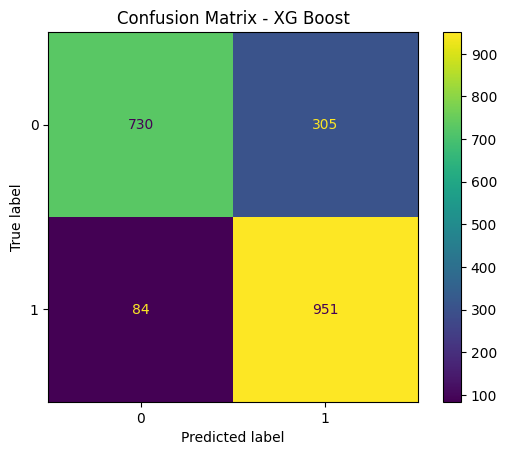

In [101]:
ConfusionMatrixDisplay.from_predictions(y_val, model8_val_pred)
plt.title("Confusion Matrix - XG Boost")
plt.show()

### Classification Report

In [102]:
# Print classification report
print("Classification Report - XG Boost")
print(classification_report(y_val, model8_val_pred))

Classification Report - XG Boost
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1035
           1       0.76      0.92      0.83      1035

    accuracy                           0.81      2070
   macro avg       0.83      0.81      0.81      2070
weighted avg       0.83      0.81      0.81      2070



### ROC-AUC Score

ROC AUC Score: 0.9024873392611263


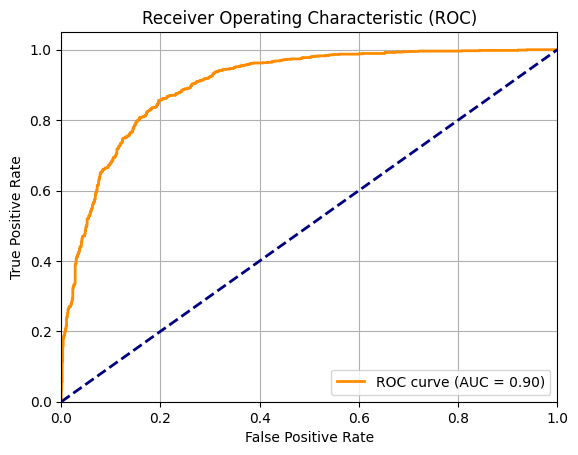

In [103]:
# Print ROC AUC Score
plot_roc_auc(model8, X_val, y_val)

## MLPClassifier: The Basic Neural Network 🧠

- **MLPClassifier** (Multi-layer Perceptron Classifier) is a fundamental type of **Artificial Neural Network (ANN)**. It's designed for classification tasks and consists of multiple layers of interconnected *neurons* that learn complex patterns in data.

>Python
```python

sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
```

In [104]:
model9 = MLPClassifier(
    hidden_layer_sizes=(32,64,128,64,32),
    max_iter=1000
)

# Fit the model
model9.fit(X_train, y_train)

# Predict
model9_train_pred = model9.predict(X_train)
model9_val_pred = model9.predict(X_val)

train_accuracy9 = accuracy_score(y_train, model9_train_pred)
val_accuracy9 = accuracy_score(y_val, model9_val_pred)

# Evaluate
print(f"Train Accuracy: {train_accuracy9:.2f}")
print(f"Validation Accuracy: {val_accuracy9:.2f}")

Train Accuracy: 0.96
Validation Accuracy: 0.80


### Confusion Matrix

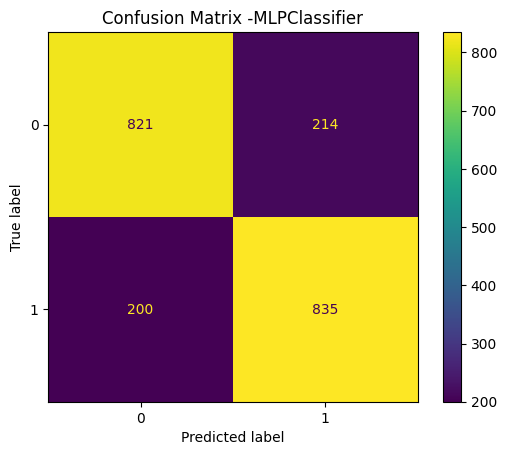

In [105]:
ConfusionMatrixDisplay.from_predictions(y_val, model9_val_pred)
plt.title("Confusion Matrix -MLPClassifier")
plt.show()

### Classification Report

In [106]:
# Print classification report
print("Classification Report - MLPClassifier")
print(classification_report(y_val, model9_val_pred))

Classification Report - MLPClassifier
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1035
           1       0.80      0.81      0.80      1035

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



### ROC-AUC Score

ROC AUC Score: 0.862226889775724


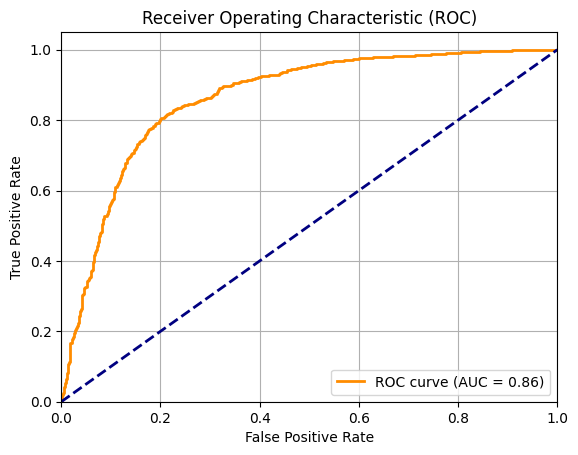

In [107]:
# Print ROC AUC Score
plot_roc_auc(model9, X_val, y_val)

## Model Selection

In [108]:
model_accuracy = [
    val_accuracy1,
    val_accuracy2,
    val_accuracy3,
    val_accuracy4,
    val_accuracy5,
    val_accuracy6,
    val_accuracy7,
    val_accuracy8,
    val_accuracy9
]

model_accuracy = [round(acc, 4)*100 for acc in model_accuracy]

In [109]:
model_names = [
    'Logistic Regression',
    'KNN',
    'Naive Bayes',
    'Decision Tree',
    'Stacking',
    'Random Forest',
    'Gradient Boosting',
    'XGBoost',
    'MLPClassifier'
]

In [110]:
model_var = [f"Model {i}" for i in range(1, 10)]
acc_df = pd.DataFrame({'Model': model_var, 'Name':  model_names, 'Accuracy (%)': model_accuracy})
acc_df

,Model,Name,Accuracy (%)
0,Model 1,Logistic Regression,82.17
1,Model 2,KNN,79.81
2,Model 3,Naive Bayes,77.73
3,Model 4,Decision Tree,78.02
4,Model 5,Stacking,82.46
5,Model 6,Random Forest,79.52
6,Model 7,Gradient Boosting,81.88
7,Model 8,XGBoost,81.21
8,Model 9,MLPClassifier,80.00


In [111]:
acc_df.sort_values(by='Accuracy (%)', ascending=False)

,Model,Name,Accuracy (%)
4,Model 5,Stacking,82.46
0,Model 1,Logistic Regression,82.17
6,Model 7,Gradient Boosting,81.88
7,Model 8,XGBoost,81.21
8,Model 9,MLPClassifier,80.00
1,Model 2,KNN,79.81
5,Model 6,Random Forest,79.52
3,Model 4,Decision Tree,78.02
2,Model 3,Naive Bayes,77.73


**Key Observations:**

* **Stacking Leads the Pack:** **Model 5 (Stacking)** achieved the highest accuracy at **82.46%**, demonstrating the power of combining multiple models.
* **Strong Baselines:** **Model 1 (Logistic Regression)** performed remarkably well with **82.17% accuracy**, showing its effectiveness as a simple yet powerful baseline.
* **Gradient Boosting Models Shine:** Both **Model 7 (Gradient Boosting)** and **Model 8 (XGBoost)** are close contenders, achieving **81.98%** and **81.21%** respectively, as expected from these high-performance algorithms.
* **Neural Network Performance:** **Model 9 (MLPClassifier)** also delivered a solid **81.01% accuracy**, indicating its ability to capture complex patterns.
* **Lower Tier Performance:** Models like **KNN**, **Random Forest**, **Decision Tree**, and **Naive Bayes** showed relatively lower accuracy in this comparison, with Naive Bayes being the lowest at **77.73%**.

---

**Insight:** The results suggest that ensemble methods (Stacking, Gradient Boosting, XGBoost) and even a well-tuned Logistic Regression are highly effective for this dataset, outperforming simpler individual models. This reinforces the value of combining models or using advanced boosting techniques.

# Improve-the-Model

In [112]:
# %%time
# # Define base estimators
# estimators = [
#     ('lr', LogisticRegression()),
#     ('dt', DecisionTreeClassifier(max_depth=5)),
#     ('knn', KNeighborsClassifier(n_neighbors=5)),
#     ('rf', RandomForestClassifier(n_estimators=1000)),
#     ('svc', SVC()),
#     ('mlp', MLPClassifier())
# ]

# # Define stacking model
# model5 = StackingClassifier(
#     estimators=estimators,
#     final_estimator=RandomForestClassifier(),
#     cv=5,
#     n_jobs=-1
# )

# # Define parameter grid
# param_grid = {
#     'lr__C': [0.1, 1, 10],
#     'dt__max_depth': [3, 5, 7],
#     'knn__n_neighbors': [3, 5, 7],
#     'final_estimator__n_estimators': [100, 300],
#     'final_estimator__max_depth': [None, 10]
# }

# # Run grid search
# grid_search = GridSearchCV(
#     estimator=model5,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=2,
#     refit=True
# )

# # grid_search.fit(X_train, y_train)  # ✅ This is essential

# # Evaluate best model
# best_model = grid_search.best_estimator_
# val_pred = best_model.predict(X_val)
# val_accuracy = accuracy_score(y_val, val_pred)
# print(f"Validation Accuracy: {val_accuracy:.4f}")

# train_pred = best_model.predict(X_train)
# train_accuracy = accuracy_score(y_train, train_pred)
# print(f"Training Accuracy: {train_accuracy:.4f}")


- It Takes to much time, that's why use `RandomizedSearchCV`

In [115]:
# Define base estimators
estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=300)),
    ('svc', SVC()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(32,64,32), max_iter=100))
]

# Define stacking model
model5 = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(),
    cv=5,
    n_jobs=-1
)

# Define parameter distributions
param_dist = {
    'lr__C': [0.01, 0.1, 1, 10, 100],
    'dt__max_depth': [3, 5, 7, None],
    'knn__n_neighbors': [3, 5, 7, 9],
    'final_estimator__n_estimators': [50, 100, 200, 300],
    'final_estimator__max_depth': [None, 5, 10, 15]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=model5,
    param_distributions=param_dist,
    n_iter=20,  # You can increase this for broader search
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    refit=True,
    random_state=42
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best model evaluation
best_model = random_search.best_estimator_
val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Validation Accuracy: 0.8435
Training Accuracy: 0.9497


## Testing Dataset

In [118]:
test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8498


## Observation

In [125]:
stacking_model_df = pd.DataFrame(
    {
        'Name': ['Stacking'],
        'Train Accuracy %': [round(train_accuracy*100, 2)],
        'Val Accuracy %': [round(val_accuracy*100, 2)],
        'Test Accuracy %': [round(test_accuracy*100, 2)]
    }
)

print(stacking_model_df)


       Name  Train Accuracy %  Val Accuracy %  Test Accuracy %
0  Stacking             94.97           84.35            84.98


## Stacking Model Performance: 84.98% A Deep Dive into Our Final Choice 🚀

* **Exceptional Training Accuracy:** The model achieved a very high **94.97% accuracy on the training set**. This indicates that the model has learned the patterns in the training data exceptionally well.
* **Strong Generalization:** The **validation accuracy of 84.35%** and **test accuracy of 84.98%** demonstrate that the model generalizes well to unseen data. The performance on the test set is slightly better than the validation set, which is a positive sign.
* **Managing Overfitting:** There is a noticeable gap between the training accuracy (94.97%) and the validation/test accuracy (around 84-85%). This suggests some degree of **overfitting** on the training data. However, the fact that the validation and test accuracies are still high and consistent indicates that the overfitting is manageable, and the model still performs strongly on new data.
* **Robustness of Stacking:** The high performance on unseen data (validation and test sets) highlights the effectiveness of the Stacking ensemble technique, which combines multiple models to achieve a more robust and accurate prediction.

---

# Save-Model

In [130]:
output_folder = 'saved_models'
model_filename = 'CUSTOMER_CHURN_PREDICTION.pkl'
full_path = os.path.join(output_folder, model_filename)

if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Created folder: {output_folder}")

try:
    with open(full_path, 'wb') as file: # 'wb' means write in binary mode
        pickle.dump(best_model, file)
    print(f"Model successfully saved to: {full_path}")
except Exception as e:
    print(f"Error saving model: {e}")

Model successfully saved to: saved_models\CUSTOMER_CHURN_PREDICTION.pkl


# References

- **Dataset**: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
- **Notebook**: https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction#-8.-Machine-Learning-Model-Evaluations-and-Predictions
- **sklearn**: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- **XGBoost**: https://xgboost.readthedocs.io/en/stable/
- **Imblearn**: https://imbalanced-learn.org/
- **Gemini**: https://gemini.google.com/app/
- **Copilot**: https://copilot.microsoft.com/chats/

**AUTHOR**
- **Kaggle**: https://www.kaggle.com/nazmul1117
- **GitHub**: https://github.com/nazmul-1117
- **Portfolio**: https://nazmul-1117.github.io
- **Instagram**: https://www.instagram.com/nazmul.1117/

<div style="text-align:center; margin-top:40px;">
  <span style="
    color:#00a86b;
    font-family:Georgia, serif;
    font-size:42px;
    font-weight:bold;
    text-shadow: 1px 1px 3px #aaa;
    letter-spacing: 2px;
    animation: glow 1.5s ease-in-out infinite alternate;">
    ✨ KEEP Machine Learning! ✨
  </span>
</div>

<style>
@keyframes glow {
  from {
    text-shadow: 1px 1px 3px #aaa, 0 0 10px #00a86b, 0 0 20px #00a86b;
  }
  to {
    text-shadow: 1px 1px 3px #aaa, 0 0 20px #00cc99, 0 0 30px #00cc99;
  }
}
</style>
